In [1]:
# Imports
# imports
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import datetime
import math

In [2]:
# get stock data
function = 'TIME_SERIES_DAILY'
symbol = 'AAPL'
outputsize = 'full'
apikey = '65TI0J2QYT96WOUN'
PARAMS = {'function': function,
         'symbol' : symbol,
         'outputsize' : outputsize,
         'apikey' : apikey}
URL = 'https://www.alphavantage.co/query'

r = requests.get(url = URL, params = PARAMS)
data = r.json()

data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2020-01-02',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-01-02': {'1. open': '296.2400',
   '2. high': '300.6000',
   '3. low': '295.1900',
   '4. close': '300.3500',
   '5. volume': '33481895'},
  '2019-12-31': {'1. open': '289.9300',
   '2. high': '293.6800',
   '3. low': '289.5200',
   '4. close': '293.6500',
   '5. volume': '25247625'},
  '2019-12-30': {'1. open': '289.4600',
   '2. high': '292.6900',
   '3. low': '285.2200',
   '4. close': '291.5200',
   '5. volume': '36059614'},
  '2019-12-27': {'1. open': '291.1200',
   '2. high': '293.9700',
   '3. low': '288.1200',
   '4. close': '289.8000',
   '5. volume': '36592936'},
  '2019-12-26': {'1. open': '284.8200',
   '2. high': '289.9800',
   '3. low': '284.7000',
   '4. close': '289.9100',
   '5. volume': '23334004'},
  '2019-12-24': {'1. open': '2

In [25]:
d = data['Time Series (Daily)']
df = pd.DataFrame(d)
df.head()

,2019-12-30,2019-12-27,2019-12-26,2019-12-24,2019-12-23,2019-12-20,2019-12-19,2019-12-18,2019-12-17,2019-12-16,...,2000-01-07,2000-01-06,2000-01-05,2000-01-04,2000-01-03,1999-12-31,1999-12-30,1999-12-29,1999-12-28,1999-12-27
1. open,289.4600,291.1200,284.8200,284.6900,280.5300,282.2300,279.5000,279.8000,279.5700,277.0000,...,96.5000,106.1200,103.7500,108.2500,104.8700,100.9400,102.1900,96.8100,99.1200,104.3700
2. high,292.6900,293.9700,289.9800,284.8900,284.2500,282.6500,281.1800,281.9000,281.7700,280.7900,...,101.0000,107.0000,110.5600,110.6200,112.5000,102.8700,104.1200,102.1900,99.6200,104.4400
3. low,285.2200,288.1200,284.7000,282.9197,280.3735,278.5600,278.9500,279.1200,278.8000,276.9800,...,95.5000,95.0000,103.0000,101.1900,101.6900,99.5000,99.6200,95.5000,95.0000,99.2500
4. close,291.5200,289.8000,289.9100,284.2700,284.0000,279.4400,280.0200,279.7400,280.4100,279.8600,...,99.5000,95.0000,104.0000,102.5000,111.9400,102.8100,100.3100,100.6900,98.1900,99.3100
5. volume,36030626,36592936,23334004,12119714,24677883,69032743,24626947,29024687,28575798,32081105,...,4113700,6856900,6949300,4574800,4783900,1462600,1849500,2540200,2210500,1503500


In [26]:
df = df.T
df.head()

,1. open,2. high,3. low,4. close,5. volume
2019-12-30,289.4600,292.6900,285.2200,291.5200,36030626
2019-12-27,291.1200,293.9700,288.1200,289.8000,36592936
2019-12-26,284.8200,289.9800,284.7000,289.9100,23334004
2019-12-24,284.6900,284.8900,282.9197,284.2700,12119714
2019-12-23,280.5300,284.2500,280.3735,284.0000,24677883


In [15]:
# formatting data into dataframe
d = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(d)
df = df.T
df = df.sort_index()
df['1. open'] = df['1. open'].astype(float)
df['2. high'] = df['2. high'].astype(float)
df['3. low'] = df['3. low'].astype(float)
df['4. close'] = df['4. close'].astype(float)
df['5. volume'] = df['5. volume'].astype(int)

df['6. difference'] = df['4. close'] - df['1. open']
df = df.set_index(pd.to_datetime(df.index))
df['7. date_without_year'] = df.index.strftime('%m')
print(df.head())
print()
print(df.shape)


            1. open  2. high  3. low  4. close  5. volume  6. difference  \
1999-12-27   104.37   104.44   99.25     99.31    1503500          -5.06   
1999-12-28    99.12    99.62   95.00     98.19    2210500          -0.93   
1999-12-29    96.81   102.19   95.50    100.69    2540200           3.88   
1999-12-30   102.19   104.12   99.62    100.31    1849500          -1.88   
1999-12-31   100.94   102.87   99.50    102.81    1462600           1.87   

           7. date_without_year  
1999-12-27                   12  
1999-12-28                   12  
1999-12-29                   12  
1999-12-30                   12  
1999-12-31                   12  
(5035, 7)


In [17]:
df_0 = pd.DataFrame()
df_0 = df.drop(columns='6. difference')
df_0 = df_0.drop(columns='7. date_without_year')

print(df_0.head())
print()
print(df_0.tail())

            1. open  2. high  3. low  4. close  5. volume
1999-12-27   104.37   104.44   99.25     99.31    1503500
1999-12-28    99.12    99.62   95.00     98.19    2210500
1999-12-29    96.81   102.19   95.50    100.69    2540200
1999-12-30   102.19   104.12   99.62    100.31    1849500
1999-12-31   100.94   102.87   99.50    102.81    1462600

            1. open  2. high    3. low  4. close  5. volume
2019-12-23   280.53   284.25  280.3735    284.00   24677883
2019-12-24   284.69   284.89  282.9197    284.27   12119714
2019-12-26   284.82   289.98  284.7000    289.91   23334004
2019-12-27   291.12   293.97  288.1200    289.80   36592936
2019-12-30   289.46   292.56  285.2200    292.45   24454569


In [16]:
forecast_col = '4. close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df_0)))

print(len(df_0))
print(df_0.shape)

forecast_out

5035
(5035, 5)


51

In [21]:
df_0[forecast_col].head()

1999-12-27     99.31
1999-12-28     98.19
1999-12-29    100.69
1999-12-30    100.31
1999-12-31    102.81
Name: 4. close, dtype: float64

In [55]:
df_0['label'] = df_0[forecast_col].shift(-forecast_out)
print(df_0.shape)
print(df_0.head())

(4984, 6)
            1. open  2. high  3. low  4. close  5. volume   label
1999-12-27   104.37   104.44   99.25     99.31    1503500  122.25
1999-12-28    99.12    99.62   95.00     98.19    2210500  125.75
1999-12-29    96.81   102.19   95.50    100.69    2540200  121.31
1999-12-30   102.19   104.12   99.62    100.31    1849500  114.25
1999-12-31   100.94   102.87   99.50    102.81    1462600  116.25


In [53]:
X = np.array(df_0.drop(['label'], 1))
print(df_0.head())
X

            1. open  2. high  3. low  4. close  5. volume   label
1999-12-27   104.37   104.44   99.25     99.31    1503500  122.25
1999-12-28    99.12    99.62   95.00     98.19    2210500  125.75
1999-12-29    96.81   102.19   95.50    100.69    2540200  121.31
1999-12-30   102.19   104.12   99.62    100.31    1849500  114.25
1999-12-31   100.94   102.87   99.50    102.81    1462600  116.25


array([[1.0437000e+02, 1.0444000e+02, 9.9250000e+01, 9.9310000e+01,
        1.5035000e+06],
       [9.9120000e+01, 9.9620000e+01, 9.5000000e+01, 9.8190000e+01,
        2.2105000e+06],
       [9.6810000e+01, 1.0219000e+02, 9.5500000e+01, 1.0069000e+02,
        2.5402000e+06],
       ...,
       [2.3490000e+02, 2.3813420e+02, 2.3467010e+02, 2.3587000e+02,
        2.4413484e+07],
       [2.3639000e+02, 2.3765000e+02, 2.3488000e+02, 2.3532000e+02,
        2.3040483e+07],
       [2.3337000e+02, 2.3524000e+02, 2.3320000e+02, 2.3437000e+02,
        1.9286694e+07]])

In [34]:
X = preprocessing.scale(X)
X

array([[-0.42255029, -0.43021263, -0.44605792, -0.45405733, -1.20945282],
       [-0.45524075, -0.45998795, -0.47277686, -0.46103576, -1.17032597],
       [-0.46962456, -0.4441119 , -0.46963345, -0.44545891, -1.15207969],
       ...,
       [ 0.70106767,  0.71595201,  0.7198309 ,  0.73352161, -0.00130745],
       [ 0.74029623,  0.74060005,  0.74133178,  0.73283623,  0.73246934],
       [ 0.72995982,  0.73188984,  0.72310004,  0.74934769,  0.06070694]])

In [50]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df_0.dropna(inplace=True)
print(X)
print(X_lately)

[[-0.41536401 -0.42302747 -0.4387365  -0.44672076 -1.20382711]
 [-0.44794256 -0.45270028 -0.46536514 -0.45367554 -1.16485104]
 [-0.46227713 -0.43687888 -0.46223236 -0.43815149 -1.14667508]
 ...
 [ 0.26431764  0.27625361  0.23477067  0.23087295  1.69122993]
 [ 0.21237812  0.20484187  0.20273172  0.20348853  0.96596647]
 [ 0.16558912  0.15694059  0.14602839  0.13716979  1.60164822]]
[[ 0.15516398  0.15335769  0.15517611  0.15989699  0.68826424]
 [ 0.14957909  0.16254887  0.15379768  0.17256462  0.55262606]
 [ 0.17930314  0.18698893  0.18869686  0.19982485  0.20228932]
 [ 0.18612912  0.18224867  0.18807031  0.18467338  0.07054378]
 [ 0.17570398  0.17788762  0.18719313  0.18150647 -0.04731371]
 [ 0.1843916   0.23999368  0.19771927  0.23422614  1.33409807]
 [ 0.19767123  0.20490343  0.20872724  0.19560231  0.7281034 ]
 [ 0.19953286  0.19690039  0.19045122  0.18933059  0.25046307]
 [ 0.20462132  0.20933588  0.21657861  0.21888838  0.30174724]
 [ 0.2439638   0.24363014  0.25533111  0.24279542

In [54]:
y = np.array(df_0['label'])
print(y)
#print(X.shape)
print(y.shape)

[122.25 125.75 121.31 ... 289.91 289.8  292.45]
(4984,)


In [61]:
import sklearn

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [62]:
X_train, X_test, y_train ,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


0.8311031347081934


In [63]:
forecast_set = clf.predict(X_lately)

print(forecast_set,accuracy,forecast_out)

[10.0750739  10.07824401 10.11133894 10.1003668  10.09719134 10.10460985
 10.10381011 10.09674192 10.13234219 10.15668007 10.15434509 10.17692178
 10.16881081 10.07702153 10.13876627 10.11336242 10.13227126 10.15389067
 10.14997715 10.13311497 10.15588616 10.17731438 10.18144111 10.1731966
 10.18922305 10.22242406 10.23054694 10.20718112 10.21643483 10.22698027
 10.23269535 10.21865857 10.19311915 10.21241864 10.19171797 10.21671013
 10.21965513 10.20849199 10.2343329  10.23480508 10.20049635 10.21252018
 10.25700386 10.24932396 10.23630316 10.26313006 10.27562481 10.30038063
 10.30560696 10.30821388 10.30512575] 0.8311031347081934 51


In [64]:
style.use('ggplot')

df_0['Forecast']=np.nan

last_date = df_0.iloc[-1].name
last_unix = last_date.timestamp()
print(last_date,last_unix)

2019-10-16 00:00:00 1571184000.0


In [66]:
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df_0.loc[next_date] = [np.nan for _ in range(len(df_0.columns)-1)]+[i]

print(df_0.tail(10))

                     1. open  2. high  3. low  4. close  5. volume  label  \
2019-11-26 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-11-27 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-11-28 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-11-29 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-11-30 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-12-01 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-12-02 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-12-03 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-12-04 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   
2019-12-05 18:00:00      NaN      NaN     NaN       NaN        NaN    NaN   

                      Forecast  
2019-11-26 18:00:00  10.212520  
2019-11-27 18:00:00  10.257004  
2019-11-28 18:00:00  10.249324  
2019-11-29 18:00:00 

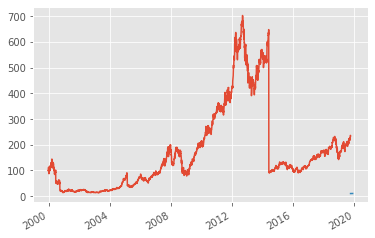

In [75]:
df_0['4. close'].plot()
#df_0['Forecast'].plot()
plt.show()


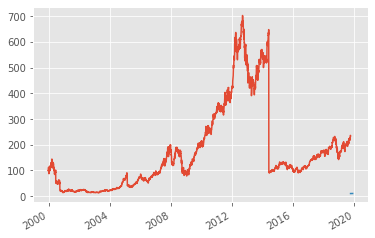

In [76]:
df_0['4. close'].plot()
df_0['Forecast'].plot()
plt.show()

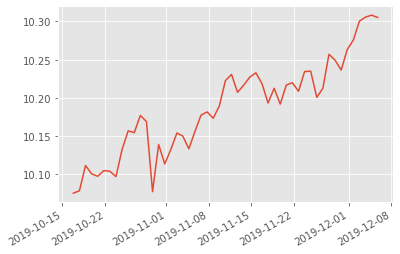

In [77]:
df_0['Forecast'].plot()
plt.show()